<a href="https://colab.research.google.com/github/virarkh/customer-segmentation-using-RFM-K-Means/blob/master/Code_Segmentasi_Pelanggan_Id_Pelanggan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [29]:
# pip install feature-engine

In [30]:
# !pip install -U -q PyDrive

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# import feature_engine
# from feature_engine.outliers import Winsorizer
# from scipy.stats.mstats import winsorize

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')



# Data Understanding

Link dataset : https://drive.google.com/drive/folders/1z-V73lRNhddRY9zX2e1CycI-twjiCJ6O?usp=sharing

In [32]:
df = pd.read_csv('/content/Dataset/Dataset Skripsi.csv')

df.head()

,Id_Pelanggan,Tanggal Pesanan,Total Pembayaran
0,320977737591,2021-08-12 14:56:12,20000
1,981703047848,2021-12-04 19:44:02,95000
2,396367766509,2021-12-03 13:56:52,95000
3,396367766509,2021-03-18 19:49:56,95000
4,396367766509,2021-05-24 11:48:33,95000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id_Pelanggan      86 non-null     int64 
 1   Tanggal Pesanan   86 non-null     object
 2   Total Pembayaran  86 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [34]:
nilai_unik = df['Id_Pelanggan'].unique()
print(nilai_unik)

[320977737591 981703047848 396367766509 973793236614 161641326961
 190858372092 125730844416 284241304752 357888014083 718859503763
 624061553681 987395451107 196514539803 399027747706 957453328427
 601212244028 394896106274 448004214293 547555776562 821049733097
 674317629947 118913331055 306086434162 576678974189   5217151423
   9673137376   2316072098   6426895314   2631799924   7516860582
   8831181101   9341231641   5344065250   4351964419   9235558211
   5113865066   2788310235   5709995778   2598470792   9024208952
   3447874327   7217900347   6971891259   1859694161   9110848612
   3041709525   9614166657   7018720802   3001641620]


In [35]:
jumlah_unik = df['Id_Pelanggan'].nunique()
print(jumlah_unik)

49


# Data Preparation

### Data Cleansing

In [36]:
# mengubah tipe data pada kolom tanggal pemesanan dari object ke date time
df['Tanggal Pesanan'] = pd.to_datetime(df['Tanggal Pesanan'])

df.head()

,Id_Pelanggan,Tanggal Pesanan,Total Pembayaran
0,320977737591,2021-08-12 14:56:12,20000
1,981703047848,2021-12-04 19:44:02,95000
2,396367766509,2021-12-03 13:56:52,95000
3,396367766509,2021-03-18 19:49:56,95000
4,396367766509,2021-05-24 11:48:33,95000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id_Pelanggan      86 non-null     int64         
 1   Tanggal Pesanan   86 non-null     datetime64[ns]
 2   Total Pembayaran  86 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 KB


In [38]:
df_duplikasi = df.copy()

df_duplikasi.head(20)

,Id_Pelanggan,Tanggal Pesanan,Total Pembayaran
0,320977737591,2021-08-12 14:56:12,20000
1,981703047848,2021-12-04 19:44:02,95000
2,396367766509,2021-12-03 13:56:52,95000
3,396367766509,2021-03-18 19:49:56,95000
4,396367766509,2021-05-24 11:48:33,95000
5,973793236614,2021-10-18 16:20:20,10000
6,973793236614,2021-10-18 16:20:20,10000
7,161641326961,2022-10-02 06:30:43,42500
8,190858372092,2021-11-02 11:08:07,100000
9,190858372092,2021-09-03 16:23:45,95000


In [39]:
df_duplikasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id_Pelanggan      86 non-null     int64         
 1   Tanggal Pesanan   86 non-null     datetime64[ns]
 2   Total Pembayaran  86 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 KB


In [40]:
# Menampilkan data duplikat berdasarkan dua kolom
duplikasi = df_duplikasi[df_duplikasi.duplicated(['Id_Pelanggan', 'Tanggal Pesanan'], keep=False)]
print("Data Duplikat:")
print(duplikasi)

Data Duplikat:
    Id_Pelanggan     Tanggal Pesanan  Total Pembayaran
5   973793236614 2021-10-18 16:20:20             10000
6   973793236614 2021-10-18 16:20:20             10000
16  624061553681 2021-08-13 14:58:58             10000
17  624061553681 2021-08-13 14:58:58             10000
18  987395451107 2021-11-05 12:53:31             10000
19  987395451107 2021-11-05 12:53:31             10000
23  957453328427 2021-09-08 21:44:34             20000
24  957453328427 2021-09-08 21:44:34             20000
31  674317629947 2021-11-18 11:27:04             10000
32  674317629947 2021-11-18 11:27:04             10000
33  118913331055 2021-11-25 09:08:12             10000
34  118913331055 2021-11-25 09:08:12             10000
36  118913331055 2021-11-30 21:37:16             20000
37  118913331055 2021-11-30 21:37:16             20000
38  576678974189 2021-12-01 16:52:39             10000
39  576678974189 2021-12-01 16:52:39             10000
40  118913331055 2021-12-02 16:26:49             3

In [41]:
# Menghapus data yang kedua kolomnya duplikat
df_duplikasi = df_duplikasi.drop_duplicates(['Id_Pelanggan', 'Tanggal Pesanan'], keep='first')
print("DataFrame setelah menghapus data duplikat:")
print(df_duplikasi)

DataFrame setelah menghapus data duplikat:
    Id_Pelanggan     Tanggal Pesanan  Total Pembayaran
0   320977737591 2021-08-12 14:56:12             20000
1   981703047848 2021-12-04 19:44:02             95000
2   396367766509 2021-12-03 13:56:52             95000
3   396367766509 2021-03-18 19:49:56             95000
4   396367766509 2021-05-24 11:48:33             95000
..           ...                 ...               ...
79    3041709525 2022-03-02 09:28:00             10000
81    3041709525 2022-03-02 09:33:00             10000
83    9614166657 2022-04-03 11:40:00             95000
84    7018720802 2022-04-09 16:47:00             95000
85    3001641620 2022-04-19 12:02:00             10000

[62 rows x 3 columns]


In [42]:
df_duplikasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id_Pelanggan      62 non-null     int64         
 1   Tanggal Pesanan   62 non-null     datetime64[ns]
 2   Total Pembayaran  62 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 KB


### RFM Scoring

In [43]:
df_rec = pd.read_csv('/content/Dataset/Data Retensi.csv')

df_rec.head()

,Id_Pelanggan,Recency
0,118913331055,3.652297
1,125730844416,0.000000
2,161641326961,0.000000
3,1859694161,0.174306
4,190858372092,59.780810


In [44]:
# Menghitung nilai recency
df_rec['Recency'] = (df_rec['Recency'] * 60).astype(int)

df_rec.head()

,Id_Pelanggan,Recency
0,118913331055,219
1,125730844416,0
2,161641326961,0
3,1859694161,10
4,190858372092,3586


In [45]:
# df_freq.to_excel(r'D:\SKRIPSI\DATA\recency.xlsx', index=True)

In [46]:
# Menghitung nilai frequency

df_freq = df_duplikasi['Id_Pelanggan'].value_counts().reset_index()

# Mengubah nama kolom hasil perhitungan
df_freq.columns = ['Id_Pelanggan', 'Frequency']

df_freq.head(10)

,Id_Pelanggan,Frequency
0,396367766509,3
1,718859503763,3
2,118913331055,3
3,1859694161,2
4,196514539803,2
5,190858372092,2
6,3041709525,2
7,9110848612,2
8,448004214293,2
9,4351964419,2


In [47]:
# df_freq.to_excel(r'D:\SKRIPSI\DATA\frequency.xlsx', index=True)

In [48]:
# menghitung nilai monetary

df_mon = df.groupby('Id_Pelanggan').agg({'Total Pembayaran':lambda x:sum(x)}).reset_index()
df_mon.rename(columns = {'Total Pembayaran' : 'Monetary'},inplace= True)

df_mon.head(10)

,Id_Pelanggan,Monetary
0,1859694161,28000
1,2316072098,40000
2,2598470792,1425000
3,2631799924,20000
4,2788310235,18200
5,3001641620,10000
6,3041709525,40000
7,3447874327,44500
8,4351964419,100000
9,5113865066,72800


In [49]:
# df_mon.to_excel(r'D:\SKRIPSI\DATA\monetary.xlsx', index=True)

In [50]:
# Menggabungkan ketiga DataFrame berdasarkan kolom "Id_Pelanggan"
merged_df = pd.merge(df_rec, df_freq, on='Id_Pelanggan', how='inner')
rfm_table = pd.merge(merged_df, df_mon, on='Id_Pelanggan', how='inner')

# Menampilkan DataFrame yang telah digabungkan
rfm_table

,Id_Pelanggan,Recency,Frequency,Monetary
0,118913331055,219,3,110000
1,125730844416,0,1,95000
2,161641326961,0,1,42500
3,1859694161,10,2,28000
4,190858372092,3586,2,195000
5,196514539803,17900,2,125000
6,2316072098,0,1,40000
7,2598470792,0,1,1425000
8,2631799924,0,1,20000
9,2788310235,0,1,18200


In [51]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id_Pelanggan  49 non-null     int64
 1   Recency       49 non-null     int64
 2   Frequency     49 non-null     int64
 3   Monetary      49 non-null     int64
dtypes: int64(4)
memory usage: 1.9 KB


In [52]:
# RFM_Table.to_excel(r'D:\SKRIPSI\DATA\rfm.xlsx', index=True)

### Deteksi Outlier

In [53]:
data_rfm = rfm_table.copy()

In [54]:
# Mendefinisikan fungsi untuk mendeteksi outlier berdasarkan IQR pada multiple kolom
def deteksi_outlier_iqr(data, kolom_list):
    outliers = pd.DataFrame()
    for kolom in kolom_list:
        Q1 = data[kolom].quantile(0.25)
        Q3 = data[kolom].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]
        outliers = pd.concat([outliers, outlier])
    outliers = outliers.drop_duplicates(keep='first')
    return outliers

In [55]:
# Mendeteksi outlier berdasarkan tiga kolom 'Kolom1', 'Kolom2', dan 'Kolom3'
outliers = deteksi_outlier_iqr(data_rfm, ['Recency', 'Frequency', 'Monetary'])
print("Outliers:")
print(outliers)

Outliers:
    Id_Pelanggan  Recency  Frequency  Monetary
0   118913331055      219          3    110000
3     1859694161       10          2     28000
4   190858372092     3586          2    195000
5   196514539803    17900          2    125000
18  396367766509     7792          3    285000
20    4351964419     2884          2    100000
21  448004214293     1793          2    190000
34  718859503763    20286          3    125000
12    3041709525        0          2     40000
40    9110848612        0          2     70000
7     2598470792        0          1   1425000


In [56]:
# Menghapus data outlier dari DataFrame asli
df_cleaned = data_rfm.drop(outliers.index)

print("DataFrame setelah menghapus outlier:")
print(df_cleaned)

DataFrame setelah menghapus outlier:
    Id_Pelanggan  Recency  Frequency  Monetary
1   125730844416        0          1     95000
2   161641326961        0          1     42500
6     2316072098        0          1     40000
8     2631799924        0          1     20000
9     2788310235        0          1     18200
10  284241304752        0          1     10000
11    3001641620        0          1     10000
13  306086434162        0          1     20000
14  320977737591        0          1     20000
15    3447874327        0          1     44500
16  357888014083        0          1     95000
17  394896106274        0          1    190000
19  399027747706        0          1     95000
22    5113865066        0          1     72800
23    5217151423        0          1     20000
24    5344065250        0          1     50000
25  547555776562        0          1     10000
26    5709995778        0          1     10000
27  576678974189        0          1     20000
28  601212244028       

In [57]:
# Winsorizer
# data_rfm_winsorized = data_rfm.copy()
# for kolom in outliers.columns:
#     data_rfm_winsorized[kolom] = winsorize(data_rfm[kolom], limits=[0.1, 0.1])

# print("Data Winsorized:")
# print(data_rfm_winsorized)

In [58]:
# df_cleaned = data_rfm_winsorized.copy()

In [59]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 48
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id_Pelanggan  38 non-null     int64
 1   Recency       38 non-null     int64
 2   Frequency     38 non-null     int64
 3   Monetary      38 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


### Transformasi Data

In [60]:
df_transform = df_cleaned.copy()

In [61]:
df_transform = df_transform.drop(['Id_Pelanggan'], axis=1)

In [62]:
df_transform.head()

,Recency,Frequency,Monetary
1,0,1,95000
2,0,1,42500
6,0,1,40000
8,0,1,20000
9,0,1,18200


In [63]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Mengubah data dengan StandardScaler
scaled_data = scaler.fit_transform(df_transform[['Recency', 'Frequency', 'Monetary']])

# Membuat DataFrame hasil transformasi
df_scaled = pd.DataFrame(scaled_data, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])

In [64]:
df_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,0.0,0.0,1.360872
1,0.0,0.0,0.022804
2,0.0,0.0,-0.040913
3,0.0,0.0,-0.550653
4,0.0,0.0,-0.596530


## Modeling

In [65]:
X = np.asarray(df_scaled)

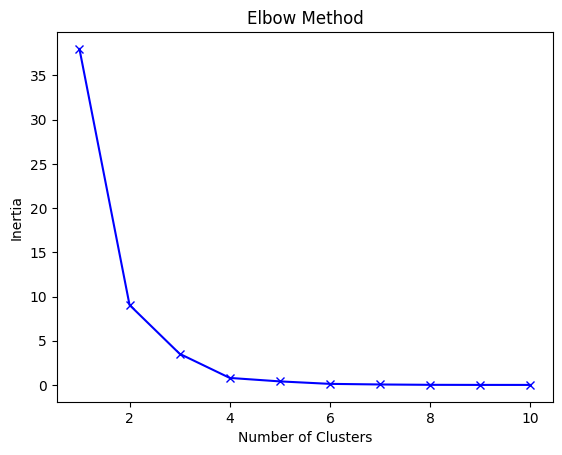

In [66]:
# Menentukan jumlah cluster yang akan diuji
k_values = range(1, 11)

# Menyimpan nilai inersia untuk setiap jumlah cluster
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Evaluation

In [67]:
model_kmeans_2 = KMeans(n_clusters = 2)
model_kmeans_2.fit(X)

KMeans(n_clusters=2)

In [68]:
model_kmeans_3 = KMeans(n_clusters = 3)
model_kmeans_3.fit(X)

KMeans(n_clusters=3)

In [69]:
model_kmeans_4 = KMeans(n_clusters = 4)
model_kmeans_4.fit(X)

KMeans(n_clusters=4)

In [70]:
print(davies_bouldin_score(X, model_kmeans_2.labels_))

0.3722461446672188


In [71]:
print(davies_bouldin_score(X, model_kmeans_3.labels_))

0.16981378642855305


In [72]:
print(davies_bouldin_score(X, model_kmeans_4.labels_))

0.21501174529777348


## Deployment

In [73]:
df_clustered = pd.DataFrame(df_cleaned)
df_clustered['cluster'] = pd.DataFrame(model_kmeans_3.labels_)
df_clustered = df_clustered.sort_values('cluster')
data_clustered = np.asarray(df_clustered)

In [74]:
cluster_labels = model_kmeans_3.labels_

In [75]:
rfm_labels_3 = df_cleaned.assign(cluster = cluster_labels)

rfm_labels_3

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
1,125730844416,0,1,95000,1
2,161641326961,0,1,42500,0
6,2316072098,0,1,40000,0
8,2631799924,0,1,20000,0
9,2788310235,0,1,18200,0
10,284241304752,0,1,10000,0
11,3001641620,0,1,10000,0
13,306086434162,0,1,20000,0
14,320977737591,0,1,20000,0
15,3447874327,0,1,44500,0


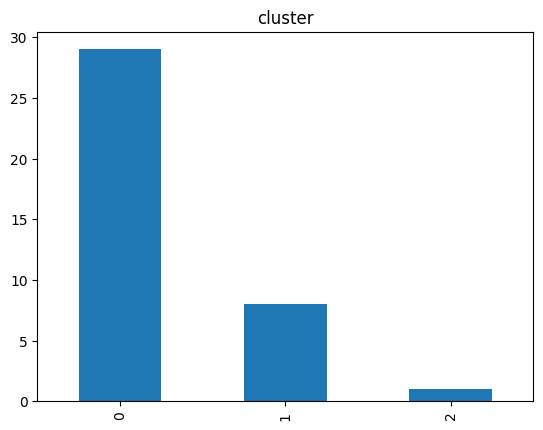

In [76]:
rfm_labels_3['cluster'].value_counts().plot(kind='bar')
plt.title('cluster');

In [77]:
cluster_0 = rfm_labels_3.loc[rfm_labels_3['cluster'] == 0]

cluster_0

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
2,161641326961,0,1,42500,0
6,2316072098,0,1,40000,0
8,2631799924,0,1,20000,0
9,2788310235,0,1,18200,0
10,284241304752,0,1,10000,0
11,3001641620,0,1,10000,0
13,306086434162,0,1,20000,0
14,320977737591,0,1,20000,0
15,3447874327,0,1,44500,0
23,5217151423,0,1,20000,0


In [78]:
cluster_1 = rfm_labels_3.loc[rfm_labels_3['cluster'] == 1]

cluster_1

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
1,125730844416,0,1,95000,1
16,357888014083,0,1,95000,1
19,399027747706,0,1,95000,1
22,5113865066,0,1,72800,1
28,601212244028,0,1,95000,1
33,7018720802,0,1,95000,1
44,9614166657,0,1,95000,1
47,981703047848,0,1,95000,1


In [79]:
cluster_2 = rfm_labels_3.loc[rfm_labels_3['cluster'] == 2]

cluster_2

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
17,394896106274,0,1,190000,2


In [80]:
rfm_labels_3.describe()

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
count,3.800000e+01,38.0,38.0,38.000000,38.000000
mean,2.690040e+11,0.0,1.0,41605.263158,0.263158
std,3.420767e+11,0.0,0.0,39762.354513,0.503190
min,2.316072e+09,0.0,1.0,10000.000000,0.000000
25%,6.563144e+09,0.0,1.0,12050.000000,0.000000
50%,9.643652e+09,0.0,1.0,20000.000000,0.000000
75%,5.104238e+11,0.0,1.0,50000.000000,0.000000
max,9.873955e+11,0.0,1.0,190000.000000,2.000000


In [81]:
cluster_0.describe()

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
count,2.900000e+01,29.0,29.0,29.000000,29.0
mean,2.531017e+11,0.0,1.0,22524.137931,0.0
std,3.503688e+11,0.0,0.0,13348.318652,0.0
min,2.316072e+09,0.0,1.0,10000.000000,0.0
25%,5.709996e+09,0.0,1.0,10000.000000,0.0
50%,9.235558e+09,0.0,1.0,20000.000000,0.0
75%,5.475558e+11,0.0,1.0,28000.000000,0.0
max,9.873955e+11,0.0,1.0,50000.000000,0.0


In [82]:
cluster_1.describe()

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
count,8.000000e+00,8.0,8.0,8.000000,8.0
mean,3.109136e+11,0.0,1.0,92225.000000,1.0
std,3.495185e+11,0.0,0.0,7848.885271,0.0
min,5.113865e+09,0.0,1.0,72800.000000,1.0
25%,8.965305e+09,0.0,1.0,95000.000000,1.0
50%,2.418094e+11,0.0,1.0,95000.000000,1.0
75%,4.495739e+11,0.0,1.0,95000.000000,1.0
max,9.817030e+11,0.0,1.0,95000.000000,1.0


In [83]:
cluster_2.describe()

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
count,1.000000e+00,1.0,1.0,1.0,1.0
mean,3.948961e+11,0.0,1.0,190000.0,2.0
std,NaN,NaN,NaN,NaN,NaN
min,3.948961e+11,0.0,1.0,190000.0,2.0
25%,3.948961e+11,0.0,1.0,190000.0,2.0
50%,3.948961e+11,0.0,1.0,190000.0,2.0
75%,3.948961e+11,0.0,1.0,190000.0,2.0
max,3.948961e+11,0.0,1.0,190000.0,2.0


In [84]:
# Mengubah nilai pada kolom "Cluster"
rfm_labels_3['cluster'] = rfm_labels_3['cluster'].replace({0: 'Dormant Customer', 1: 'Golden Customer', 2: 'Superstar'})

rfm_labels_3

,Id_Pelanggan,Recency,Frequency,Monetary,cluster
1,125730844416,0,1,95000,Golden Customer
2,161641326961,0,1,42500,Dormant Customer
6,2316072098,0,1,40000,Dormant Customer
8,2631799924,0,1,20000,Dormant Customer
9,2788310235,0,1,18200,Dormant Customer
10,284241304752,0,1,10000,Dormant Customer
11,3001641620,0,1,10000,Dormant Customer
13,306086434162,0,1,20000,Dormant Customer
14,320977737591,0,1,20000,Dormant Customer
15,3447874327,0,1,44500,Dormant Customer


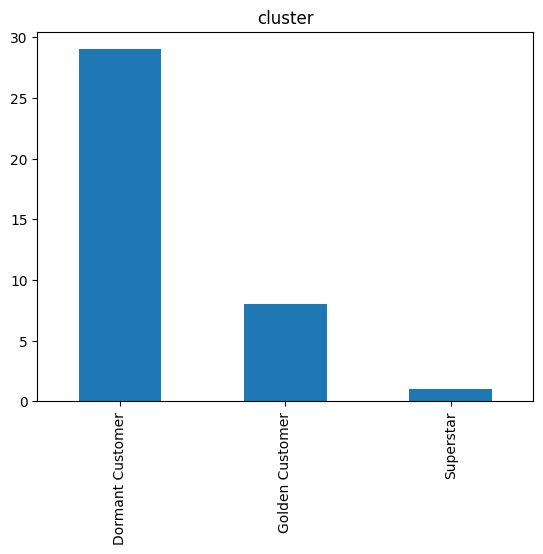

In [85]:
rfm_labels_3['cluster'].value_counts().plot(kind='bar')
plt.title('cluster');